In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from numpy import array
from scipy.sparse import csr_matrix


In [167]:
logist_df = pd.read_csv('data/final_fraud_dataset.csv')

cols = logist_df.columns.tolist()
cat_preds_fields = cols[1:2]+cols[4:9]+cols[11:22]+cols[27:28]+cols[31:32]+cols[33:36]+cols[37:38]+cols[39:55]
num_preds_fields = cols[9:11]+cols[22:26]+cols[32:33]+cols[71:72]+cols[73:81]
non_preds_fields = cols[1:4]+ cols[26:27]+cols[28:32]+cols[33:37]+cols[38:39]+cols[55:71]
pred_fields =  cols[72:73]


logist_df[cat_preds_fields]  = logist_df[cat_preds_fields].astype('category')

reorder_cols = non_preds_fields+num_preds_fields + cat_preds_fields

logist_preds_df = logist_df[reorder_cols]
logist_nonpreds_df = logist_df[reorder_cols]
logist_num_preds_df = logist_df[reorder_cols+pred_fields]

#logist_num_preds_df = logist_num_preds_df+cols[72:73]
logist_num_preds_df = logist_num_preds_df.drop(non_preds_fields + cat_preds_fields, axis=1)
logist_nonpreds_df = logist_preds_df.drop(num_preds_fields + cat_preds_fields, axis=1)
logist_preds_df = logist_preds_df.drop(non_preds_fields, axis=1)

In [168]:
logist_num_preds_df

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DaysAdmitted,Age,NoPhysician,AttendingPhysicianPresent,OtherPhysicianPresent,OperatingPhysicianPresent,NoOfDiag,NoOfProc,NoOfChronicCondition,PotentialFraud
0,12,12,36000,3204,60,70,26000,7,66,1,1,0,0,9,0,7,Yes
1,12,12,19000,1068,100,20,19000,13,95,3,1,1,1,9,2,5,Yes
2,12,12,17000,1068,1050,540,17000,19,87,2,1,0,1,9,1,2,Yes
3,12,12,27000,2136,450,160,13000,5,79,3,1,1,1,7,1,6,Yes
4,12,12,3000,1068,8900,740,3000,5,83,2,1,0,1,1,1,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,12,12,20000,2136,740,320,12000,8,57,3,1,1,1,9,1,9,No
40470,12,12,5000,1068,2670,360,5000,8,66,3,1,1,1,9,1,7,No
40471,12,12,26790,2136,70,0,14000,9,70,1,1,0,0,9,0,9,No
40472,12,12,10300,1068,5390,1730,10000,1,51,2,1,0,1,8,1,7,No


In [123]:
logist_preds_df.Alive.replace(to_replace = "N", value = 0)

0        0
1        0
2        0
3        0
4        0
        ..
40469    0
40470    0
40471    0
40472    0
40473    0
Name: Alive, Length: 40474, dtype: category
Categories (2, object): [0, Y]

In [60]:
logist_preds_df.Alive.replace(to_replace = "Y", value = 1)

0        N
1        N
2        N
3        N
4        N
        ..
40469    N
40470    N
40471    N
40472    N
40473    N
Name: Alive, Length: 40474, dtype: category
Categories (2, object): [N, 1]

In [ ]:
This is a count plot that shows the number of patients that were alive when a claim was filed

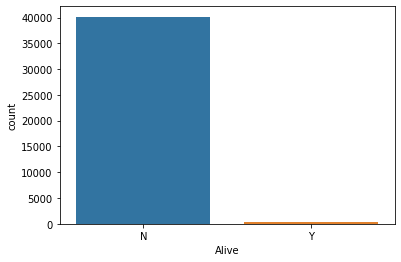

In [64]:
sns.countplot(x='Alive',data=logist_preds_df) 

This is a count plot that shows the number of potential frauds which is our target prediction.

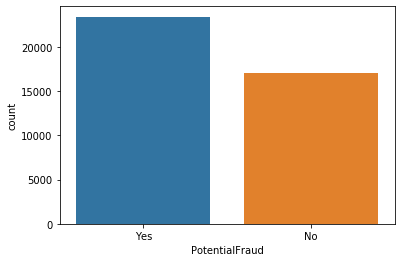

In [85]:
sns.countplot(x='PotentialFraud',data=logist_nonpreds_df)

Creating the Test Train Split using SKlearn model selection

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(logist_num_preds_df.drop('PotentialFraud',axis=1), 
                                                    logist_num_preds_df['PotentialFraud'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
Train the model and predict outcome using the LogisticRegression function from SKLearn

In [170]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

To conduct an evaluation of the model we can check precision, recall, and f1-score using clasifiation report

In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00      5078
         Yes       0.58      1.00      0.74      7065

    accuracy                           0.58     12143
   macro avg       0.29      0.50      0.37     12143
weighted avg       0.34      0.58      0.43     12143

